In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [133]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [134]:
jpeg_map = pd.read_csv("../measurements/jpeg_snr_cha/map.csv")
decom_map= pd.read_csv("../measurements/decomposition_snr_cha/map.csv")
reg_map = pd.read_csv("../measurements/regression_snr_cha/map.csv")
jpeg_cha = pd.read_csv("../measurements/jpeg_snr_cha/characteristic.csv")
decom_cha= pd.read_csv("../measurements/decomposition_snr_cha/characteristic.csv")
reg_cha = pd.read_csv("../measurements/regression_snr_cha/characteristic.csv")

In [135]:
local_map = pd.read_csv("../../dynamic_framework/measurements/local/map.csv")

Text(0, 0.5, 'DNN detection perforamnce [%]')

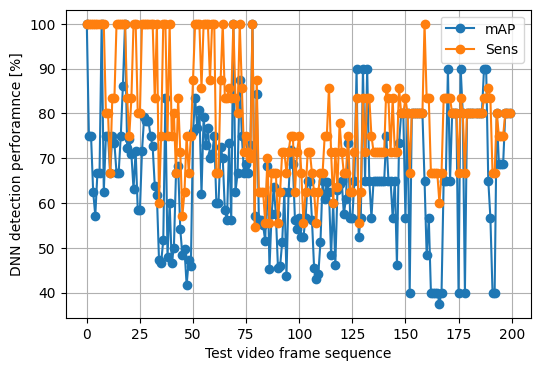

In [136]:
x = np.arange(200)
plt.figure(figsize=(6,4))
plt.plot(x,local_map["map"].to_numpy()*100,"o-", label="mAP")
plt.plot(x,local_map["sensitivity"].to_numpy()*100,"o-", label="Sens")
# plt.axhline(y = 60, color = 'r', linestyle = '-') 
plt.legend()
plt.grid()
plt.xlabel("Test video frame sequence")
plt.ylabel("DNN detection perforamnce [%]")

Text(0, 0.5, 'DNN detection perforamnce [%]')

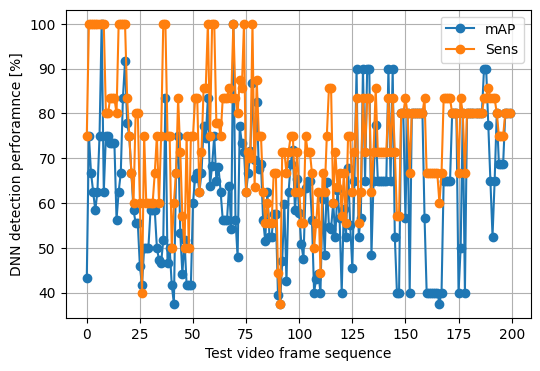

In [137]:
map_df_group = jpeg_map.groupby("pruning_thresh")
map_df = map_df_group.get_group(0.2)
map_quality_df = map_df.groupby("quality")
map_plot_df= map_quality_df.get_group(100)


x = np.arange(200)
plt.figure(figsize=(6,4))
plt.plot(x,map_plot_df["map"].to_numpy()*100,"o-", label="mAP")
plt.plot(x,map_plot_df["sensitivity"].to_numpy()*100,"o-", label="Sens")
# plt.axhline(y = 60, color = 'r', linestyle = '-') 
plt.legend()
plt.grid()
plt.xlabel("Test video frame sequence")
plt.ylabel("DNN detection perforamnce [%]")

Text(0, 0.5, 'DNN detection perforamnce drop [%]')

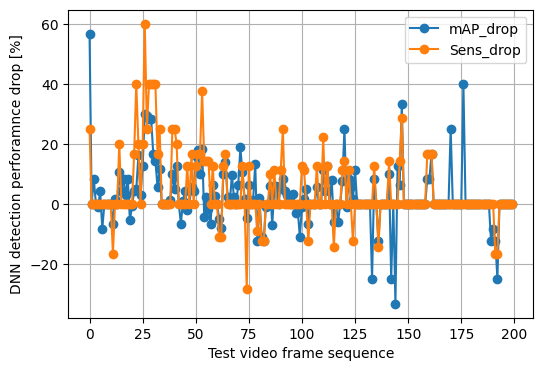

In [138]:
diff_map = (local_map["map"].to_numpy()-map_plot_df["map"].to_numpy())*100
diff_sens= (local_map["sensitivity"].to_numpy()-map_plot_df["sensitivity"].to_numpy())*100

x = np.arange(200)
plt.figure(figsize=(6,4))
plt.plot(x,diff_map,"o-", label="mAP_drop")
plt.plot(x,diff_sens,"o-", label="Sens_drop")
plt.legend()
plt.grid()
plt.xlabel("Test video frame sequence")
plt.ylabel("DNN detection perforamnce drop [%]")

In [ ]:
coef_map = [-2.15430309e-05,  2.53090430e-03, -1.10683795e-01,  2.17196770e+00, -1.94865597e+01,  1.09932162e+02]
coef_sens = [-3.37021127e-05,  3.59472798e-03, -1.40599955e-01,  2.46219543e+00,-2.03229254e+01,  1.13382156e+02]

neg_coef_map =[7.13443051e-02, 2.30385963e+00, 2.02866193e+01, 9.77133556e+01]
neg_coef_sens=[-4.62220154e-03, -1.42088795e-01, -1.55618683e+00, -6.16369058e+00,5.72246825e+00,  1.04737843e+02]

In [140]:
poly_map = np.poly1d(coef_map)
poly_sens = np.poly1d(coef_sens)
upper_bound_x = np.linspace(0, 40, 100)
upper_bound_map = poly_map(upper_bound_x)
upper_bound_sens = poly_sens(upper_bound_x)

neg_poly_map = np.poly1d(neg_coef_map)
neg_poly_sens = np.poly1d(neg_coef_sens)
neg_upper_bound_x = np.linspace(-12,0,50)
neg_upper_bound_map = neg_poly_map(neg_upper_bound_x)
neg_upper_bound_sens = neg_poly_sens(neg_upper_bound_x)

In [141]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [60,70,80,90,100]

In [142]:
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = jpeg_map.groupby("pruning_thresh")
cha_df_group =jpeg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy()) *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())*100
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

In [143]:
snr_cleaned = snr[np.isnan(snr) ==False]
map_diff = map_diff[np.isnan(snr) ==False]
sens_diff = sens_diff[np.isnan(snr) ==False]

Text(0, 0.5, 'Frame mAP/sensitivity drop [%]')

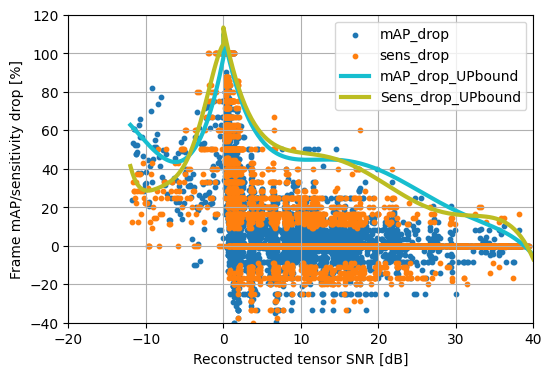

In [144]:

plt.figure(figsize=(6,4))
plt.scatter(snr_cleaned, map_diff, s=10,label="mAP_drop")
plt.scatter(snr_cleaned, sens_diff, s=10, label= "sens_drop")
plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_map,upper_bound_map)), linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
plt.plot(np.concatenate((neg_upper_bound_x,upper_bound_x)), np.concatenate((neg_upper_bound_sens,upper_bound_sens)),linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
plt.legend()
plt.grid()
plt.xlim([-20, 40])
plt.ylim([-40,120])
plt.xlabel("Reconstructed tensor SNR [dB]")
plt.ylabel("Frame mAP/sensitivity drop [%]")
# plt.autoscale(axis="x",tight=True)

In [129]:
pruning = [0,0.05, 0.1, 0.15, 0.2, 0.25,0.3]
quality = [1,2,3,4,5]

In [130]:
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = reg_map.groupby("pruning_thresh")
cha_df_group =reg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy()) *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy()) *100
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned = snr[np.isnan(snr) ==False]
map_diff = map_diff[np.isnan(snr) ==False]
sens_diff = sens_diff[np.isnan(snr) ==False]

Text(0, 0.5, 'Frame mAP/sensitivity drop [%]')

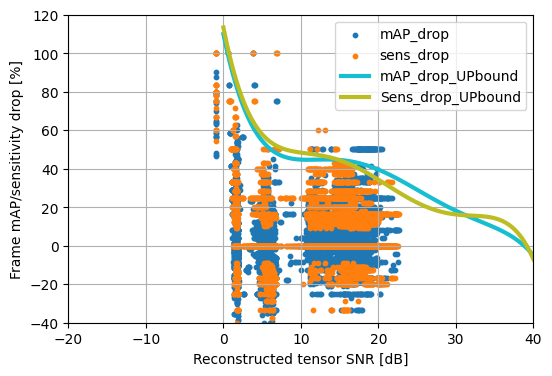

In [131]:

plt.figure(figsize=(6,4))
plt.scatter(snr_cleaned, map_diff, s=10, label="mAP_drop")
plt.scatter(snr_cleaned, sens_diff, s=10,  label= "sens_drop")
plt.plot(upper_bound_x, upper_bound_map, linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
plt.plot(upper_bound_x, upper_bound_sens,linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
plt.legend()
plt.grid()
plt.xlim([-20, 40])
plt.ylim([-40,120])
plt.xlabel("Reconstructed tensor SNR [dB]")
plt.ylabel("Frame mAP/sensitivity drop [%]")

In [125]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [2,4,6,8,10]

In [126]:
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

map_df_group = decom_map.groupby("pruning_thresh")
cha_df_group =decom_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy()) *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy()) *100
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned = snr[np.isnan(snr) ==False]
map_diff = map_diff[np.isnan(snr) ==False]
sens_diff = sens_diff[np.isnan(snr) ==False]

Text(0, 0.5, 'Frame mAP/sensitivity drop [%]')

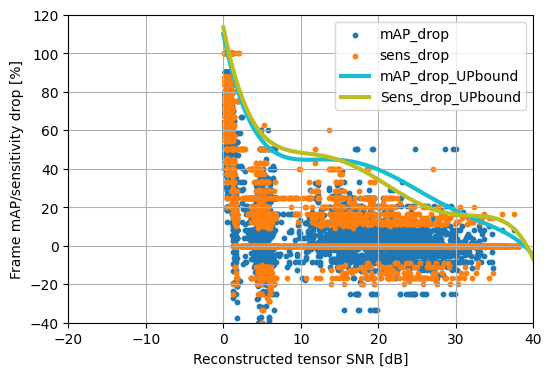

In [128]:
plt.figure(figsize=(6,4))
plt.scatter(snr_cleaned, map_diff, s =10, label="mAP_drop")
plt.scatter(snr_cleaned, sens_diff, s=10, label= "sens_drop")
plt.plot(upper_bound_x, upper_bound_map, linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
plt.plot(upper_bound_x, upper_bound_sens,linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
plt.legend()
plt.grid()
plt.xlim([-20, 40])
plt.ylim([-40,120])
plt.xlabel("Reconstructed tensor SNR [dB]")
plt.ylabel("Frame mAP/sensitivity drop [%]")

# Merged test

In [16]:
snr =[]
map_diff=[]
map_raw =[]
sens_diff =[]
sens_raw = []

In [17]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [60,70,80,90,100]
map_df_group = jpeg_map.groupby("pruning_thresh")
cha_df_group =jpeg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy()) *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy())*100
        sens_diff += sens_des.tolist()

pruning = [0,0.05, 0.1, 0.15, 0.2, 0.25,0.3]
quality = [1,2,3,4,5]
map_df_group = reg_map.groupby("pruning_thresh")
cha_df_group =reg_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy()) *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy()) *100
        sens_diff += sens_des.tolist()

pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
quality = [2,4,6,8,10]
map_df_group = decom_map.groupby("pruning_thresh")
cha_df_group =decom_cha.groupby("pruning_thresh")
for p in pruning:
    map_df = map_df_group.get_group(p)
    cha_df = cha_df_group.get_group(p)
    map_quality_df = map_df.groupby("quality")
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        map_plot_df= map_quality_df.get_group(q)
        cha_plot_df= cha_quality_df.get_group(q)
        snr += cha_plot_df["reconstruct_snr"].to_list()
        map_des = (local_map["map"].to_numpy() - map_plot_df["map"].to_numpy()) *100
        map_diff += map_des.tolist()
        map_raw +=map_plot_df["map"].to_list()
        sens_raw += map_plot_df["sensitivity"].to_list()
        sens_des = (local_map["sensitivity"].to_numpy() - map_plot_df["sensitivity"].to_numpy()) *100
        sens_diff += sens_des.tolist()

snr =np.array(snr)
map_diff=np.array(map_diff)
map_raw = np.array(map_raw)
sens_diff = np.array(sens_diff)
sens_raw = np.array(sens_raw)

snr_cleaned = snr[np.isnan(snr) ==False]
map_diff = map_diff[np.isnan(snr) ==False]
sens_diff = sens_diff[np.isnan(snr) ==False]

In [30]:
map_diff = map_diff[snr_cleaned<0]
sens_diff = sens_diff[snr_cleaned<0]
snr_cleaned = snr_cleaned[snr_cleaned<0]

Text(0, 0.5, 'Frame mAP/sensitivity drop [%]')

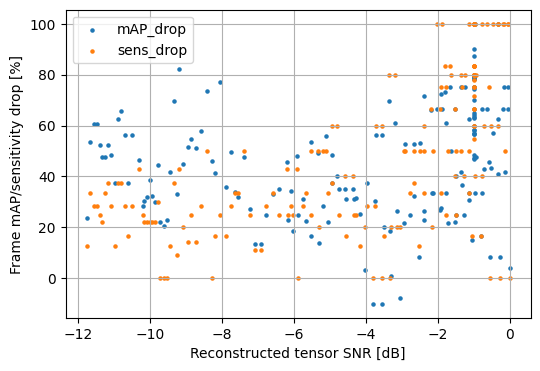

In [55]:
plt.figure(figsize=(6,4))
plt.scatter(snr_cleaned, map_diff, s=5, label="mAP_drop")
plt.scatter(snr_cleaned, sens_diff, s=5, label= "sens_drop")
# plt.plot(upper_bound_x, upper_bound_map, linewidth=3.0,color="tab:cyan",label="mAP_drop_UPbound")
# plt.plot(upper_bound_x, upper_bound_sens,linewidth=3.0,color="tab:olive", label="Sens_drop_UPbound")
plt.legend()
plt.grid()

# plt.xlim([0, 40])
# plt.ylim([0,100])
plt.xlabel("Reconstructed tensor SNR [dB]")
plt.ylabel("Frame mAP/sensitivity drop [%]")

In [56]:
bins = np.linspace(min(snr_cleaned), max(snr_cleaned), num=50)  # Adjust bin count as needed
upper_boundary_x = []
upper_boundary_y = []

for i in range(len(bins) - 1):
    bin_mask = (snr_cleaned >= bins[i]) & (snr_cleaned < bins[i + 1])
    bin_y = map_diff[bin_mask]
    
    if len(bin_y) > 0:
        upper_boundary_x.append((bins[i] + bins[i + 1]) / 2)  # Midpoint of bin
        upper_boundary_y.append(bin_y.max())  # Max y-value in bin

In [115]:
degree = 5 # Adjust degree as necessary
coefficients = np.polyfit(upper_boundary_x, upper_boundary_y, degree)
polynomial = np.poly1d(coefficients)

In [116]:
coefficients

array([-8.52191326e-03, -2.80310007e-01, -3.24948839e+00, -1.45724490e+01,
       -1.31403212e+01,  8.16895598e+01])

In [117]:
fit_x = np.linspace(min(upper_boundary_x), max(upper_boundary_x), 100)
fit_y = polynomial(fit_x)

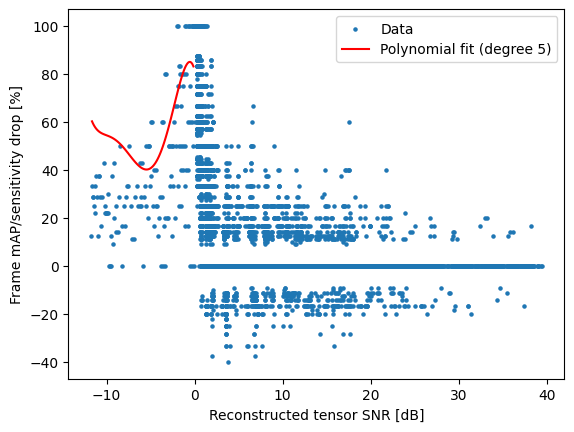

In [118]:
plt.scatter(snr_cleaned, sens_diff, s=5, label='Data')
plt.plot(fit_x, fit_y, color='red', label=f'Polynomial fit (degree {degree})')
plt.xlabel("Reconstructed tensor SNR [dB]")
plt.ylabel("Frame mAP/sensitivity drop [%]")
plt.legend()